Import functions and modules: using Pytorch

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
import numpy as np
import matplotlib.pyplot as plt
torch.set_default_dtype(torch.float64)


Define neural networks: normally fully connected nn with Tanh as activation function

In [12]:
# all global constants are set here

DEFAULT_WIDTH = 20
DEFAULT_DEPTH = 4

class PINN_U(nn.Module):
    def __init__(self, width=DEFAULT_WIDTH, depth=DEFAULT_DEPTH):
        super(PINN_U, self).__init__()
        self.width = width
        if depth < 2:
          raise ValueError(f"depth must be at least 2, got {depth}")
        self.depth = depth
        self.act = nn.Tanh()

        # layer definitions
        self.FC_dict = nn.ModuleDict()
        self.FC_dict[f"layer 1"] = nn.Linear(1, self.width)
        for i in range(2, depth):
          self.FC_dict[f"layer {i}"] = nn.Linear(self.width, self.width)
        self.FC_dict[f"layer {depth}"] = nn.Linear(self.width, 1)

    def forward(self, x):
      for key, layer in self.FC_dict.items():
        x = layer(x)
        if key != f"layer {self.depth}":
          x = self.act(x)
      return x

Initialization of the nn: call the class using cuda GPU; choice of optimizer (Adam, L-bfgs), scheduler (weight_decay, reduce_lr_on_plateau)

Here we use no weight decay for Adam and we can manually adjust it later on.

In [13]:
torch.manual_seed(0)
np.random.seed(0)
model_U = PINN_U().cuda()
print(model_U)
LAMBDA_INIT = 0.25
l = torch.tensor([LAMBDA_INIT,], dtype=torch.float64, device='cuda', requires_grad=True)
# define an optimizer

params = list(model_U.parameters()) 

#optimizer = torch.optim.Adam(param?, lr=0.001, weight_decay=0)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.5)
nn_optimizer = torch.optim.Adam(params, lr=0.001, weight_decay=0)
#nn_scheduler = torch.optim.lr_scheduler.StepLR(nn_optimizer, step_size=1000, gamma=0.5)
l_optimizer = torch.optim.Adam([l], lr=0.001, weight_decay=0)
#l_scheduler = torch.optim.lr_scheduler.StepLR(l_optimizer, step_size=1000, gamma=0.5)

PINN_U(
  (act): Tanh()
  (FC_dict): ModuleDict(
    (layer 1): Linear(in_features=1, out_features=20, bias=True)
    (layer 2): Linear(in_features=20, out_features=20, bias=True)
    (layer 3): Linear(in_features=20, out_features=20, bias=True)
    (layer 4): Linear(in_features=20, out_features=1, bias=True)
  )
)


Adam; very accurately and robostly identified smooth solutions; arbitrary initialization of the nn and value of l

Double precision and More samples!


Epoch is 0, interior loss is 0.019624099300074232, boundary loss is 1.7082159557926613,  smoothness loss is 0.1803382034861572, overall loss is 1.7282121860712845 
tensor([0.2490], device='cuda:0', requires_grad=True)


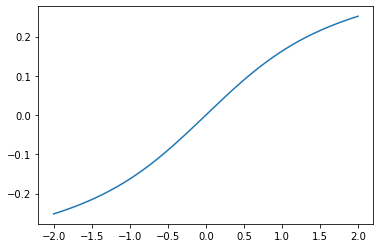

Epoch is 1000, interior loss is 0.0059645871775080165, boundary loss is 2.68978967314835e-05,  smoothness loss is 0.012224848299179471, overall loss is 0.0018458414444002323 
tensor([0.2504], device='cuda:0', requires_grad=True)


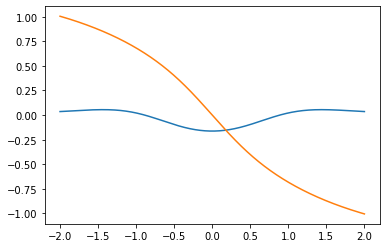

Epoch is 2000, interior loss is 0.0006802990010246747, boundary loss is 1.673873930034307e-05,  smoothness loss is 0.004741520141676808, overall loss is 0.0005589206535704914 
tensor([0.3921], device='cuda:0', requires_grad=True)


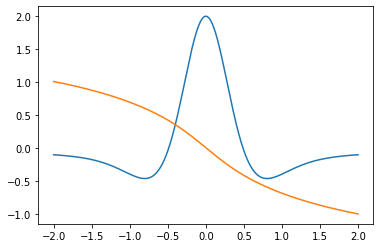

Epoch is 3000, interior loss is 3.269851753326908e-05, boundary loss is 4.288714445370094e-07,  smoothness loss is 0.0005697436892878763, overall loss is 6.067309212665155e-05 
tensor([0.4845], device='cuda:0', requires_grad=True)


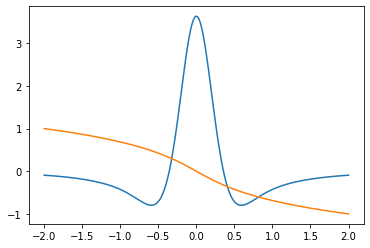

Epoch is 4000, interior loss is 2.802650477818422e-06, boundary loss is 2.7442264311542263e-06,  smoothness loss is 0.00013827621571146914, overall loss is 1.6852113050082984e-05 
tensor([0.4946], device='cuda:0', requires_grad=True)


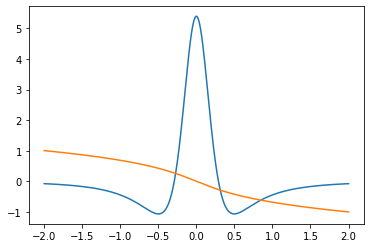

Epoch is 5000, interior loss is 1.8150576769996206e-06, boundary loss is 5.764575933715462e-06,  smoothness loss is 0.00035367077415384253, overall loss is 4.1313159116799674e-05 
tensor([0.4965], device='cuda:0', requires_grad=True)


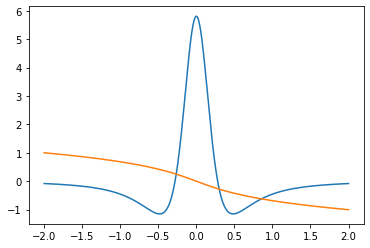

Epoch is 6000, interior loss is 1.8770824126152987e-07, boundary loss is 1.4747572311619007e-08,  smoothness loss is 2.0809780914323068e-05, overall loss is 2.114496487870079e-06 
tensor([0.4974], device='cuda:0', requires_grad=True)


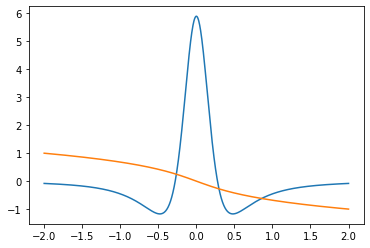

Epoch is 7000, interior loss is 1.6035016715278113e-07, boundary loss is 6.741102195219087e-09,  smoothness loss is 1.3520971844122131e-05, overall loss is 1.3748733033227102e-06 
tensor([0.4977], device='cuda:0', requires_grad=True)


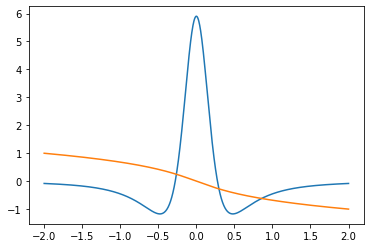

Epoch is 8000, interior loss is 8.094668457745466e-08, boundary loss is 3.868442323958734e-09,  smoothness loss is 8.461044029331077e-06, overall loss is 8.580675137148119e-07 
tensor([0.4983], device='cuda:0', requires_grad=True)


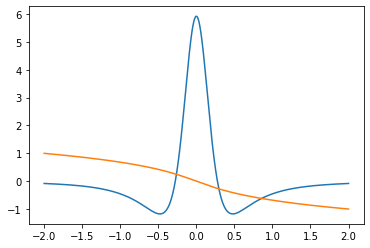

Epoch is 9000, interior loss is 2.7451920128504357e-06, boundary loss is 3.881633086741087e-07,  smoothness loss is 0.0008865041187023245, overall loss is 8.931309438019161e-05 
tensor([0.4979], device='cuda:0', requires_grad=True)


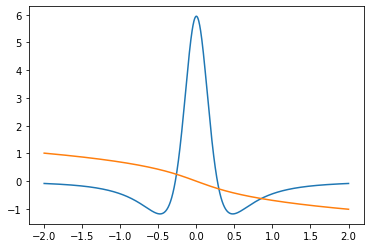

Epoch is 10000, interior loss is 5.0741980504647505e-08, boundary loss is 2.6227737323193097e-09,  smoothness loss is 7.441069215193474e-06, overall loss is 7.518038933021316e-07 
tensor([0.4985], device='cuda:0', requires_grad=True)


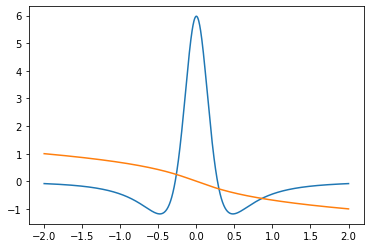

Epoch is 11000, interior loss is 2.874122155973289e-07, boundary loss is 9.023239162518939e-07,  smoothness loss is 5.554547854272693e-05, overall loss is 6.4856129920843195e-06 
tensor([0.4986], device='cuda:0', requires_grad=True)


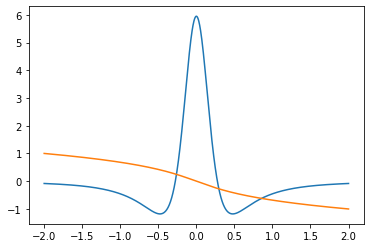

Epoch is 12000, interior loss is 7.706108231685208e-07, boundary loss is 7.387080250867704e-06,  smoothness loss is 0.0004532566008720486, overall loss is 5.278980142038942e-05 
tensor([0.4983], device='cuda:0', requires_grad=True)


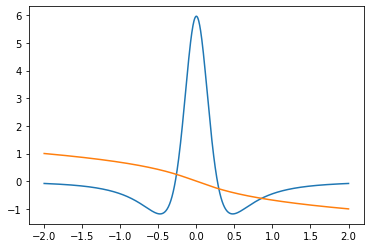

Epoch is 13000, interior loss is 3.531678977062752e-07, boundary loss is 1.102047857660106e-08,  smoothness loss is 9.553657932162844e-06, overall loss is 1.001703061563513e-06 
tensor([0.4975], device='cuda:0', requires_grad=True)


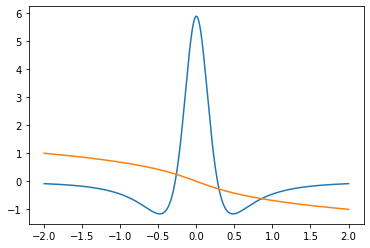

Epoch is 14000, interior loss is 8.92000795765361e-07, boundary loss is 1.3693491245628882e-06,  smoothness loss is 0.00012043631604631394, overall loss is 1.350218080877082e-05 
tensor([0.4979], device='cuda:0', requires_grad=True)


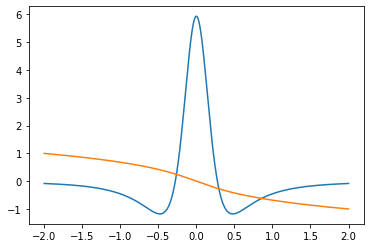

Epoch is 15000, interior loss is 2.2241537759916775e-07, boundary loss is 9.4744917080434e-09,  smoothness loss is 8.338984135315557e-06, overall loss is 8.656144429995159e-07 
tensor([0.4978], device='cuda:0', requires_grad=True)


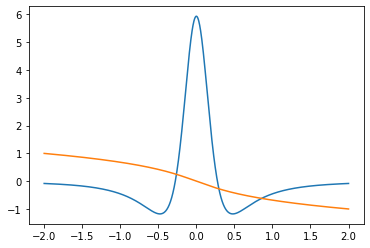

Epoch is 16000, interior loss is 2.4830886843018983e-08, boundary loss is 1.5232257309556502e-09,  smoothness loss is 7.476192613018846e-06, overall loss is 7.516255757171422e-07 
tensor([0.4987], device='cuda:0', requires_grad=True)


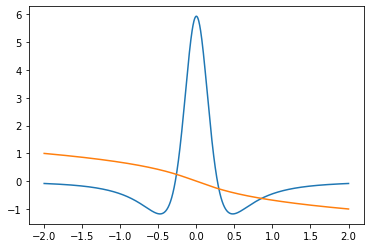

Epoch is 17000, interior loss is 2.0186012734857803e-07, boundary loss is 7.330467528718652e-07,  smoothness loss is 3.9320621229894156e-05, overall loss is 4.685294888596138e-06 
tensor([0.4987], device='cuda:0', requires_grad=True)


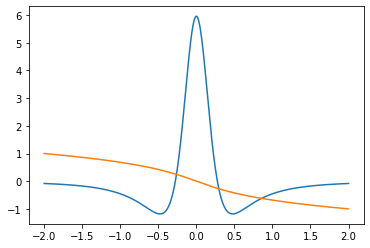

Epoch is 18000, interior loss is 5.12351180562737e-08, boundary loss is 1.2504614444786268e-08,  smoothness loss is 8.431881950593438e-06, overall loss is 8.608163213097575e-07 
tensor([0.4985], device='cuda:0', requires_grad=True)


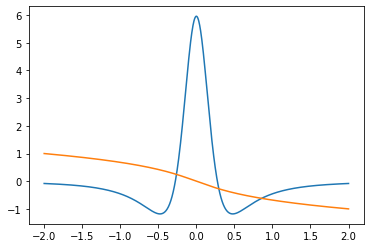

Epoch is 19000, interior loss is 1.5722387191353227e-07, boundary loss is 4.9390486655304793e-08,  smoothness loss is 1.2532872365999259e-05, overall loss is 1.3184001104465839e-06 
tensor([0.4985], device='cuda:0', requires_grad=True)


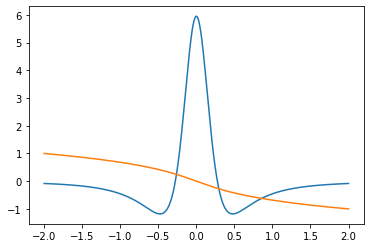

Epoch is 20000, interior loss is 1.442417954618661e-08, boundary loss is 3.8363939687667284e-14,  smoothness loss is 7.010582584965243e-06, overall loss is 7.025007148150826e-07 
tensor([0.4990], device='cuda:0', requires_grad=True)


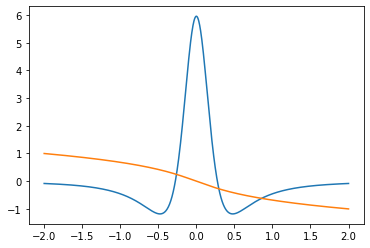

Epoch is 21000, interior loss is 5.3619207494467045e-08, boundary loss is 3.676680561882592e-08,  smoothness loss is 8.080560441134799e-06, overall loss is 8.501847704817526e-07 
tensor([0.4988], device='cuda:0', requires_grad=True)


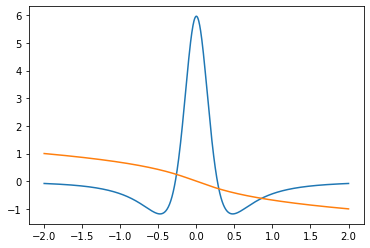

Epoch is 22000, interior loss is 1.1427419730834247e-07, boundary loss is 1.1479885482627259e-08,  smoothness loss is 7.090493808986815e-06, overall loss is 7.31956686112143e-07 
tensor([0.4984], device='cuda:0', requires_grad=True)


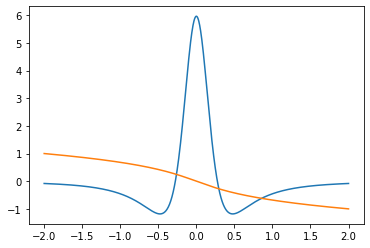

Epoch is 23000, interior loss is 1.1107083862247941e-07, boundary loss is 1.759956116696833e-07,  smoothness loss is 1.467470467614287e-05, overall loss is 1.6545731631462184e-06 
tensor([0.4988], device='cuda:0', requires_grad=True)


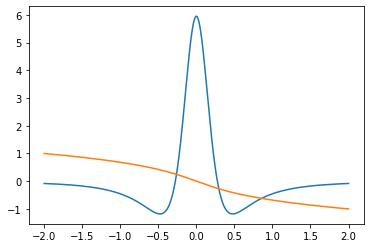

Epoch is 24000, interior loss is 8.841144314544826e-08, boundary loss is 3.78895778451402e-08,  smoothness loss is 8.130740610410818e-06, overall loss is 8.598047832007669e-07 
tensor([0.4986], device='cuda:0', requires_grad=True)


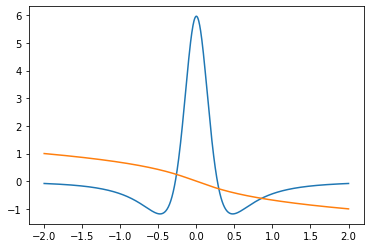

Epoch is 25000, interior loss is 4.859025424995322e-08, boundary loss is 2.646785534674286e-09,  smoothness loss is 7.121476933718657e-06, overall loss is 7.196535043315353e-07 
tensor([0.4989], device='cuda:0', requires_grad=True)


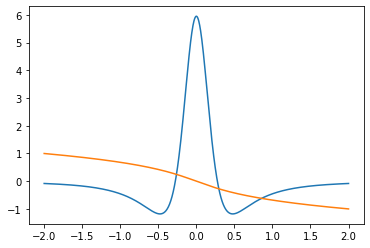

Epoch is 26000, interior loss is 3.094025034798955e-07, boundary loss is 1.0370517197408083e-06,  smoothness loss is 6.814109009791529e-05, overall loss is 7.882100979880328e-06 
tensor([0.4989], device='cuda:0', requires_grad=True)


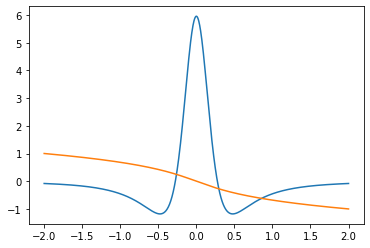

Epoch is 27000, interior loss is 4.645838061226985e-07, boundary loss is 1.6980136361789543e-06,  smoothness loss is 8.621305074510253e-05, overall loss is 1.0365777091301477e-05 
tensor([0.4987], device='cuda:0', requires_grad=True)


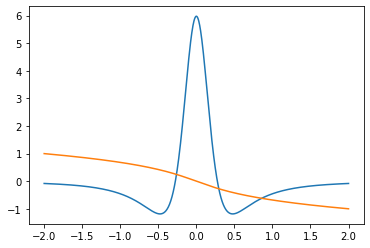

Epoch is 28000, interior loss is 4.5708242762885305e-08, boundary loss is 3.986131720284635e-09,  smoothness loss is 6.018058403396322e-06, overall loss is 6.103627963362053e-07 
tensor([0.4987], device='cuda:0', requires_grad=True)


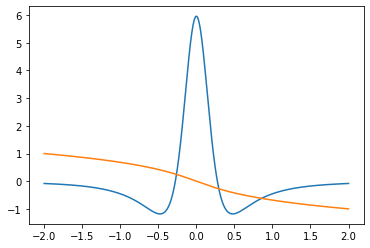

Epoch is 29000, interior loss is 1.7901551989095202e-07, boundary loss is 9.788888110662198e-09,  smoothness loss is 6.227687045885682e-06, overall loss is 6.504591446883256e-07 
tensor([0.4980], device='cuda:0', requires_grad=True)


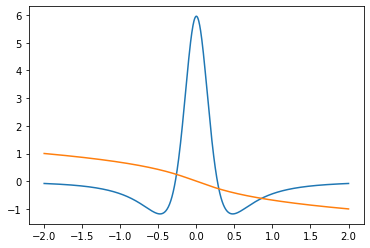

Epoch is 30000, interior loss is 6.557043181737468e-07, boundary loss is 2.0456350934155777e-06,  smoothness loss is 0.00021290908616022604, overall loss is 2.3402114141255557e-05 
tensor([0.4987], device='cuda:0', requires_grad=True)


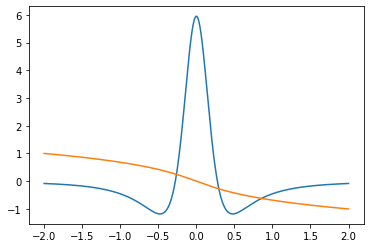

Epoch is 31000, interior loss is 2.7119355475658948e-09, boundary loss is 5.038758206319156e-08,  smoothness loss is 5.088536012734621e-06, overall loss is 5.595123768914103e-07 
tensor([0.4992], device='cuda:0', requires_grad=True)


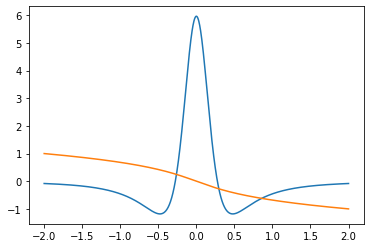

Epoch is 32000, interior loss is 2.494509032392565e-07, boundary loss is 1.795850680809235e-09,  smoothness loss is 1.8841742708008912e-05, overall loss is 1.910915211805626e-06 
tensor([0.4986], device='cuda:0', requires_grad=True)


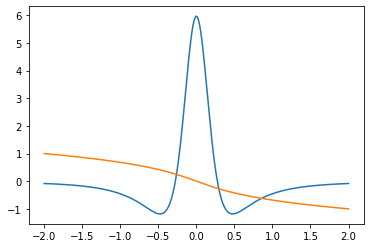

Epoch is 33000, interior loss is 2.3999799551950477e-08, boundary loss is 2.0827268015472342e-06,  smoothness loss is 4.300703060550415e-05, overall loss is 6.385829842052844e-06 
tensor([0.4983], device='cuda:0', requires_grad=True)


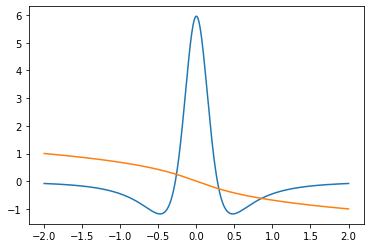

Epoch is 34000, interior loss is 2.4906638746151763e-08, boundary loss is 2.433080566175906e-10,  smoothness loss is 4.588569196159898e-06, overall loss is 4.6159089154722256e-07 
tensor([0.4990], device='cuda:0', requires_grad=True)


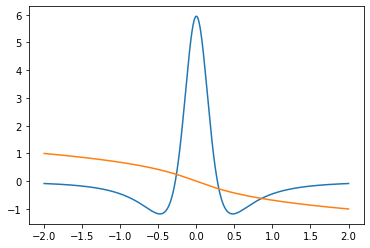

Epoch is 35000, interior loss is 4.579127618054267e-08, boundary loss is 5.3401745688502544e-08,  smoothness loss is 6.523963350477778e-06, overall loss is 7.103772083543347e-07 
tensor([0.4991], device='cuda:0', requires_grad=True)


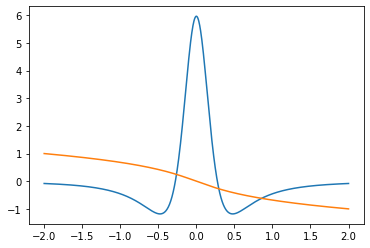

Epoch is 36000, interior loss is 4.5765966801250014e-07, boundary loss is 2.3597411978091862e-08,  smoothness loss is 7.492394019129737e-06, overall loss is 8.186027806923155e-07 
tensor([0.4976], device='cuda:0', requires_grad=True)


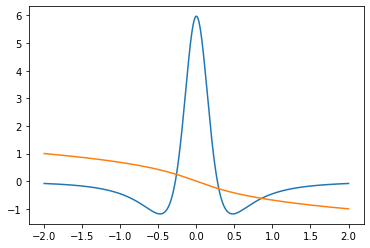

Epoch is 37000, interior loss is 1.2290677813226221e-08, boundary loss is 4.812131354174799e-10,  smoothness loss is 4.300174254813473e-06, overall loss is 4.3172770639808744e-07 
tensor([0.4992], device='cuda:0', requires_grad=True)


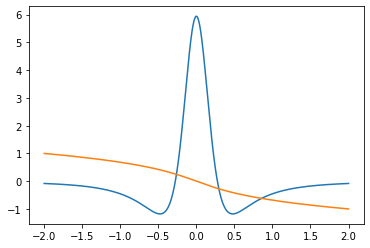

Epoch is 38000, interior loss is 5.980599005243849e-08, boundary loss is 6.801985432078129e-09,  smoothness loss is 6.841052185905533e-06, overall loss is 6.968878030278754e-07 
tensor([0.4990], device='cuda:0', requires_grad=True)


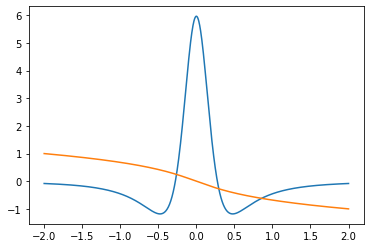

Epoch is 39000, interior loss is 1.849057305851565e-08, boundary loss is 6.263852076040245e-09,  smoothness loss is 4.711861668750704e-06, overall loss is 4.792990762569622e-07 
tensor([0.4993], device='cuda:0', requires_grad=True)


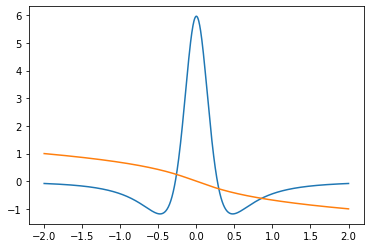

Epoch is 40000, interior loss is 6.262115500882188e-07, boundary loss is 1.1585694501527766e-05,  smoothness loss is 0.00034461722088737265, overall loss is 4.6110037745273857e-05 
tensor([0.4987], device='cuda:0', requires_grad=True)


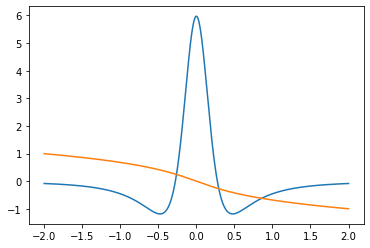

Epoch is 41000, interior loss is 4.862517217902148e-09, boundary loss is 4.122489973106729e-09,  smoothness loss is 3.5199716621624144e-06, overall loss is 3.566059079111384e-07 
tensor([0.4993], device='cuda:0', requires_grad=True)


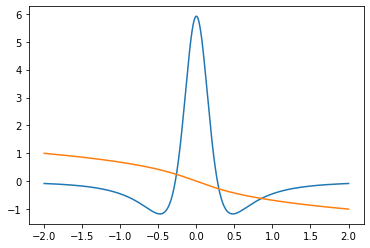

Epoch is 42000, interior loss is 2.018395778983032e-07, boundary loss is 5.889423633435433e-09,  smoothness loss is 4.756112805890237e-06, overall loss is 5.016846620122894e-07 
tensor([0.4983], device='cuda:0', requires_grad=True)


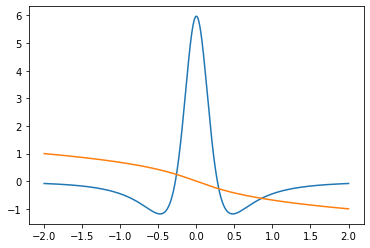

Epoch is 43000, interior loss is 3.771452572063279e-09, boundary loss is 1.4895783895676848e-09,  smoothness loss is 3.956700496385543e-06, overall loss is 3.9753677328532833e-07 
tensor([0.4992], device='cuda:0', requires_grad=True)


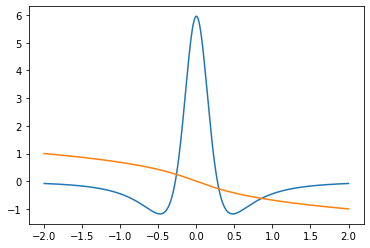

Epoch is 44000, interior loss is 2.5566994481118952e-09, boundary loss is 1.0961822730288363e-07,  smoothness loss is 8.155009926055685e-06, overall loss is 9.253748898532634e-07 
tensor([0.4993], device='cuda:0', requires_grad=True)


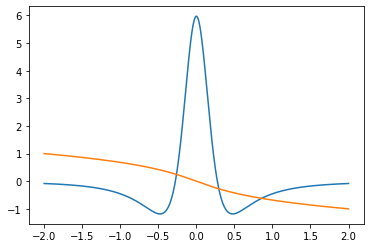

Epoch is 45000, interior loss is 2.496641308964336e-07, boundary loss is 5.045569235562739e-08,  smoothness loss is 2.7829949134370576e-05, overall loss is 2.8584170188823285e-06 
tensor([0.4992], device='cuda:0', requires_grad=True)


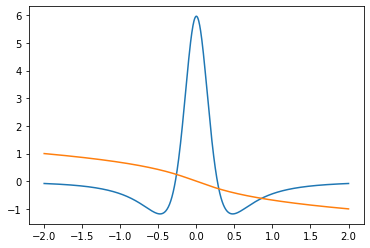

Epoch is 46000, interior loss is 7.841499827864983e-07, boundary loss is 3.928981979201861e-06,  smoothness loss is 0.00020062113953906962, overall loss is 2.4069510931387476e-05 
tensor([0.4990], device='cuda:0', requires_grad=True)


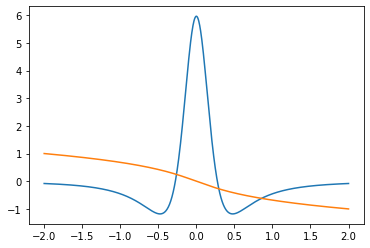

Epoch is 47000, interior loss is 4.966985137550164e-10, boundary loss is 1.0122787399362977e-07,  smoothness loss is 6.704946035082685e-06, overall loss is 7.717721473532739e-07 
tensor([0.4992], device='cuda:0', requires_grad=True)


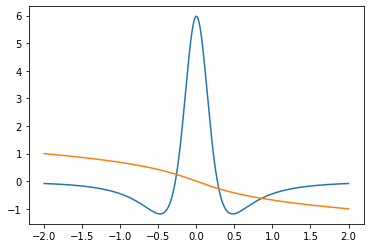

Epoch is 48000, interior loss is 6.232026224245524e-09, boundary loss is 2.99266836201809e-08,  smoothness loss is 5.1979693028585524e-06, overall loss is 5.503468165284607e-07 
tensor([0.4991], device='cuda:0', requires_grad=True)


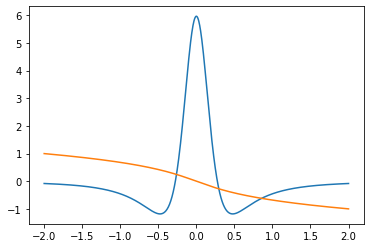

Epoch is 49000, interior loss is 1.9470965344670112e-08, boundary loss is 5.635551685362018e-08,  smoothness loss is 3.881595540357792e-06, overall loss is 4.4646216742386647e-07 
tensor([0.4990], device='cuda:0', requires_grad=True)


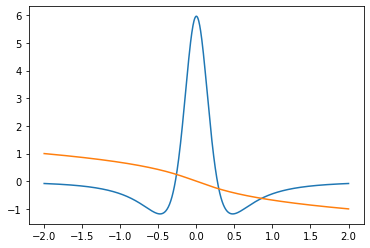

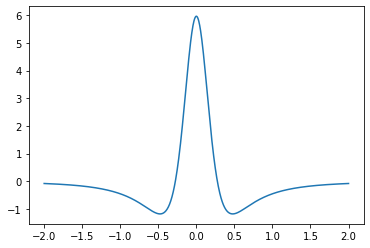

In [14]:
###### solving for 0.5
batchsize = 2000
#l=0.5
for ep in range(50000):
    nn_optimizer.zero_grad()
    l_optimizer.zero_grad()
    #initialization and derivatives
    y1 = torch.rand(batchsize, 1, device='cuda', requires_grad=True)# (batch, 1) resample y
    y1 = y1*4 - 2
    U = model_U(y1)-model_U(-y1)
    Uy = grad(U.sum(), y1, create_graph=True)[0]
    #interior and smoothness losses
    Fu = -l * U + ((1+l)*y1 + U) * Uy
    Fu_x = grad(Fu.sum(), y1, create_graph=True)[0]
    Fu_xx = grad(Fu_x.sum(), y1, create_graph=True)[0]
    Fu_xxx = grad(Fu_xx.sum(), y1, create_graph=True)[0]
    loss_i = torch.norm(Fu)**2/batchsize
    loss_s = torch.norm(Fu_xxx)**2/batchsize
    # define the loss on the boundary
    # U(-2) = 1, U(2) = -1
    z = torch.tensor([-2], dtype=torch.float64, device='cuda', requires_grad=True).reshape(1,1) # (batch, 1)
    Utruth = torch.tensor([1], dtype=torch.float64, device='cuda', requires_grad=False).reshape(1,1)
    #impose parity
    U = model_U(z)-model_U(-z)
    loss_b = torch.norm(U - Utruth)**2
    loss =0.1*loss_i +1*loss_b +0.1*loss_s
    #back propogation of losses
    loss.backward()
    nn_optimizer.step()
    #nn_scheduler.step()
    l_optimizer.step()
    #l_scheduler.step()
    if ep % 1000 == 0:
        print("Epoch is {}, interior loss is {}, boundary loss is {},  smoothness loss is {}, overall loss is {} ".format(ep, loss_i.item(),loss_b.item(),loss_s.item(), loss.item()))
        print(l)
        y = torch.linspace(-2,2,1001, requires_grad=True).cuda().reshape(1001,1)
        U = model_U(y)-model_U(-y)
        plt.plot(y.detach().cpu().numpy(), U.detach().cpu().numpy())
        plt.show()


        Uy = grad(U.sum(), y, create_graph=True)[0]
        Uyy = grad(Uy.sum(), y, create_graph=True)[0]
        Uyyy = grad(Uyy.sum(), y, create_graph=True)[0]

        plt.plot(y.detach().cpu().numpy(), Uyyy.detach().cpu().numpy())
        # plt.show()

l0=l
model_U0 = model_U

In [8]:
l=l0
model_U= model_U0 

Improved LBFGS works

In [15]:
optimizer = LBFGS(params,line_search_fn = "strong_wolfe")
#nn_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.5)
#l_optimizer = torch.optim.Adam([l], lr=0.001, weight_decay=0)
l_optimizer = LBFGS([l],line_search_fn = "strong_wolfe")
#closure for lbfgs
def closure():
    if y1.grad is not None: 
        y1.grad.detach()
        y1.grad.zero_()
    optimizer.zero_grad()
    l_optimizer.zero_grad()
    U = model_U(y1)-model_U(-y1)
    Uy = grad(U.sum(), y1, create_graph=True)[0]
    Fu = -l * U + (y1*(1+l)+ U) * Uy
    Fu_x = grad(Fu.sum(), y1, create_graph=True)[0]
    Fu_xx = grad(Fu_x.sum(), y1, create_graph=True)[0]
    Fu_xxx = grad(Fu_xx.sum(), y1, create_graph=True)[0]
    loss_i = torch.norm(Fu)**2/batchsize
    loss_s =torch.norm(Fu_xxx)**2/batchsize

    z = torch.tensor([-2], dtype=torch.float64, device='cuda', requires_grad=False).reshape(1,1) # (batch, 1)
    Utruth = torch.tensor([1], dtype=torch.float64, device='cuda', requires_grad=False).reshape(1,1)

    U = model_U(z)-model_U(-z)
    loss_b = torch.norm(U - Utruth)**2

    
    loss =0.1*loss_i +1*loss_b +0.1*loss_s
    loss.backward()
    return loss

Epoch is 0, interior loss is 1.1627902770485205e-08, boundary loss is 8.578832735558253e-09,  smoothness loss is 2.960416764574386e-06, overall loss is 3.057832994700454e-07 
tensor([0.4991], device='cuda:0', requires_grad=True)
tensor([-0.0009], device='cuda:0', grad_fn=<SubBackward0>)


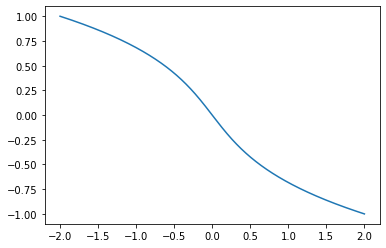

Epoch is 100, interior loss is 3.536150160806407e-09, boundary loss is 3.975117182801831e-12,  smoothness loss is 1.5397851644927085e-07, overall loss is 1.575544177819053e-08 
tensor([0.4998], device='cuda:0', requires_grad=True)
tensor([-0.0002], device='cuda:0', grad_fn=<SubBackward0>)


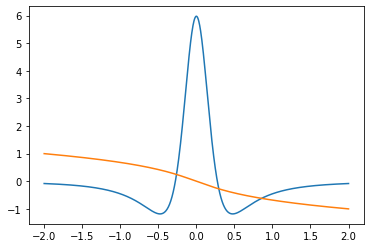

Epoch is 200, interior loss is 2.378871972058155e-10, boundary loss is 1.522507859823168e-13,  smoothness loss is 7.844467750761972e-08, overall loss is 7.868408721268537e-09 
tensor([0.4999], device='cuda:0', requires_grad=True)
tensor([-6.7943e-05], device='cuda:0', grad_fn=<SubBackward0>)


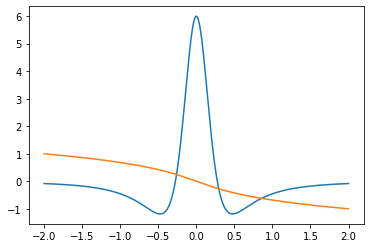

Epoch is 300, interior loss is 1.0170872056426879e-10, boundary loss is 2.0823127734962402e-14,  smoothness loss is 5.35921736326448e-08, overall loss is 5.369409058448642e-09 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-4.9706e-05], device='cuda:0', grad_fn=<SubBackward0>)


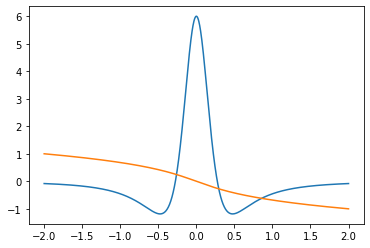

Epoch is 400, interior loss is 1.9821075655055044e-11, boundary loss is 1.1652765259362015e-14,  smoothness loss is 3.78906921824187e-08, overall loss is 3.791062978572635e-09 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-3.8317e-05], device='cuda:0', grad_fn=<SubBackward0>)


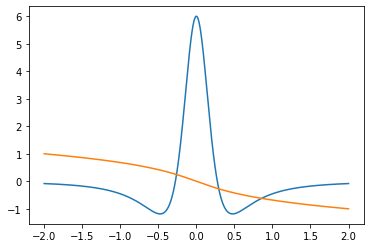

Epoch is 500, interior loss is 1.4140209964591417e-12, boundary loss is 1.595770044908661e-13,  smoothness loss is 3.047760959435395e-08, overall loss is 3.048061938539532e-09 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-3.2747e-05], device='cuda:0', grad_fn=<SubBackward0>)


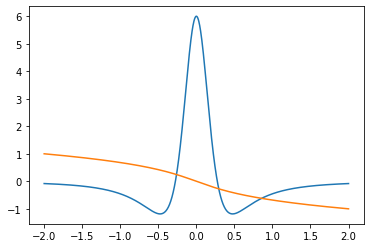

Epoch is 600, interior loss is 6.26109705680403e-13, boundary loss is 1.1087477008754463e-14,  smoothness loss is 2.3181846572058672e-08, overall loss is 2.318258355653444e-09 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-2.6559e-05], device='cuda:0', grad_fn=<SubBackward0>)


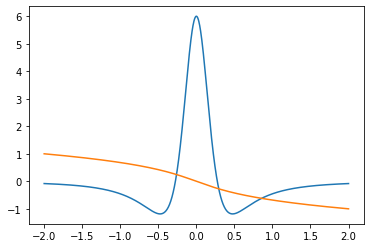

Epoch is 700, interior loss is 7.032880854257088e-12, boundary loss is 1.01899507022157e-14,  smoothness loss is 1.6866419812618288e-08, overall loss is 1.6873554592979568e-09 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-2.2712e-05], device='cuda:0', grad_fn=<SubBackward0>)


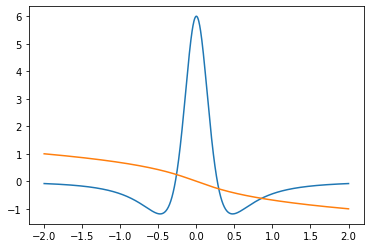

Epoch is 800, interior loss is 1.324312349093584e-12, boundary loss is 4.415470998585111e-15,  smoothness loss is 1.116889724473117e-08, overall loss is 1.117026571179025e-09 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-1.8281e-05], device='cuda:0', grad_fn=<SubBackward0>)


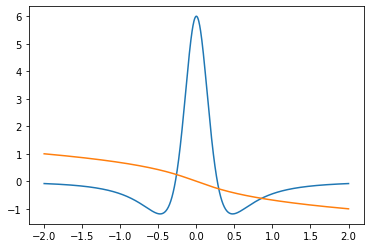

Epoch is 900, interior loss is 1.8197348226903957e-12, boundary loss is 3.8097491553404324e-17,  smoothness loss is 7.70281710691587e-09, overall loss is 7.704637222713476e-10 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-1.6000e-05], device='cuda:0', grad_fn=<SubBackward0>)


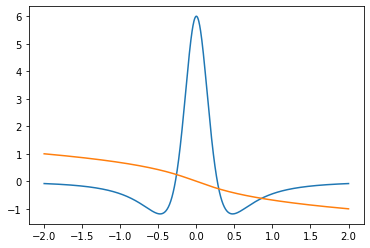

Epoch is 1000, interior loss is 5.779622205448398e-12, boundary loss is 3.585694425101262e-16,  smoothness loss is 4.941236935982555e-09, overall loss is 4.947020143882428e-10 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-1.2461e-05], device='cuda:0', grad_fn=<SubBackward0>)


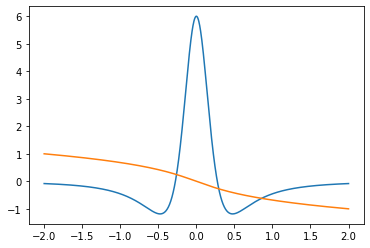

Epoch is 1100, interior loss is 1.1608729315355013e-12, boundary loss is 5.093462306121722e-16,  smoothness loss is 3.5933561872222864e-09, overall loss is 3.5945221536161284e-10 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-9.8018e-06], device='cuda:0', grad_fn=<SubBackward0>)


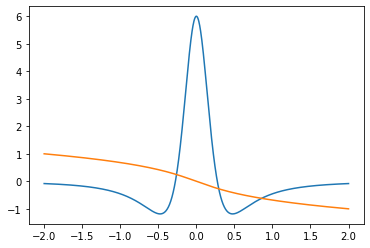

Epoch is 1200, interior loss is 3.2494974694688126e-13, boundary loss is 1.5173578689485888e-16,  smoothness loss is 2.3860999244234756e-09, overall loss is 2.3864263915282916e-10 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-7.5064e-06], device='cuda:0', grad_fn=<SubBackward0>)


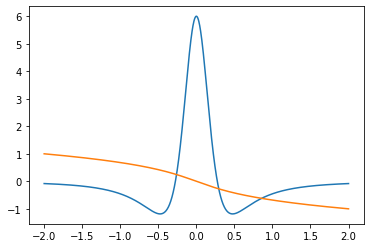

Epoch is 1300, interior loss is 5.705784529556398e-14, boundary loss is 4.2993242199489544e-17,  smoothness loss is 1.812670943756985e-09, overall loss is 1.8127284315347026e-10 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-5.7210e-06], device='cuda:0', grad_fn=<SubBackward0>)


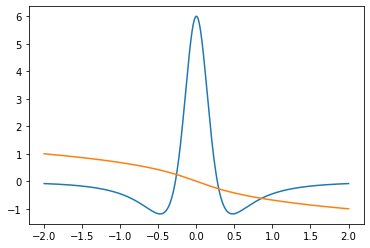

Epoch is 1400, interior loss is 8.334773493494449e-13, boundary loss is 2.1988209707607734e-16,  smoothness loss is 1.4134176407221033e-09, overall loss is 1.4142533168924237e-10 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-4.4382e-06], device='cuda:0', grad_fn=<SubBackward0>)


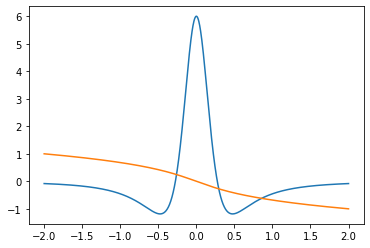

Epoch is 1500, interior loss is 7.048619360849233e-13, boundary loss is 2.2654319556654017e-15,  smoothness loss is 1.0826575430944042e-09, overall loss is 1.0833850593500458e-10 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-3.6527e-06], device='cuda:0', grad_fn=<SubBackward0>)


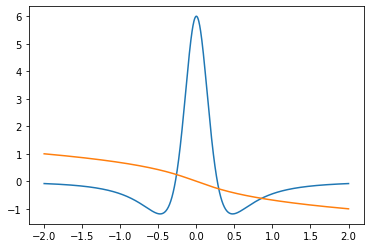

Epoch is 1600, interior loss is 3.226484824921187e-14, boundary loss is 2.408708465032271e-16,  smoothness loss is 9.384211832568099e-10, overall loss is 9.384558568135241e-11 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-3.1775e-06], device='cuda:0', grad_fn=<SubBackward0>)


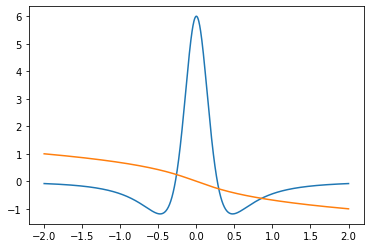

Epoch is 1700, interior loss is 3.1449303473176106e-15, boundary loss is 2.51466988648633e-16,  smoothness loss is 7.870570189731499e-10, overall loss is 7.870626785733838e-11 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-2.2593e-06], device='cuda:0', grad_fn=<SubBackward0>)


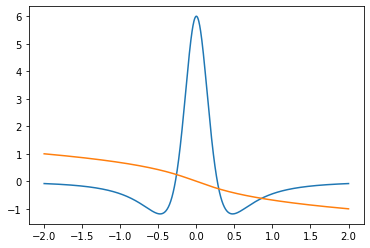

Epoch is 1800, interior loss is 2.5767752480397723e-14, boundary loss is 5.994923881242464e-17,  smoothness loss is 7.407352374567916e-10, overall loss is 7.407616047016601e-11 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-1.7594e-06], device='cuda:0', grad_fn=<SubBackward0>)


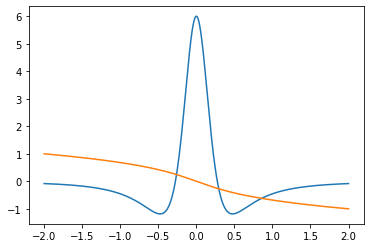

Epoch is 1900, interior loss is 5.380225800763837e-14, boundary loss is 8.758671665044434e-18,  smoothness loss is 6.699966466130712e-10, overall loss is 6.700505364577955e-11 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-1.3962e-06], device='cuda:0', grad_fn=<SubBackward0>)


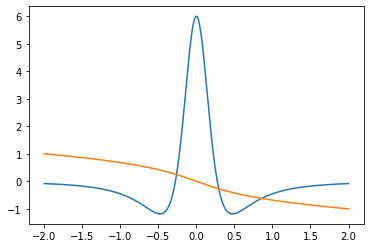

Epoch is 2000, interior loss is 9.324502465811702e-14, boundary loss is 1.6223570286885779e-18,  smoothness loss is 6.579395405947628e-10, overall loss is 6.580328018429912e-11 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-1.1753e-06], device='cuda:0', grad_fn=<SubBackward0>)


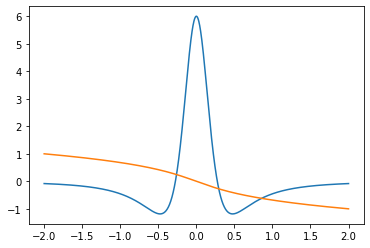

Epoch is 2100, interior loss is 7.708942943501347e-14, boundary loss is 2.725335745278471e-17,  smoothness loss is 6.496136886458973e-10, overall loss is 6.496910506089068e-11 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-8.5788e-07], device='cuda:0', grad_fn=<SubBackward0>)


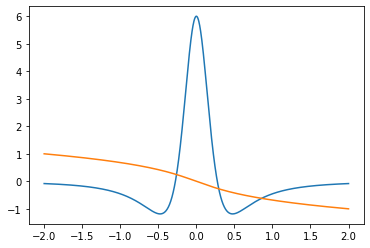

Epoch is 2200, interior loss is 2.2406340042469973e-14, boundary loss is 2.0907533707379866e-16,  smoothness loss is 6.093213088323153e-10, overall loss is 6.093458059257287e-11 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-7.0752e-07], device='cuda:0', grad_fn=<SubBackward0>)


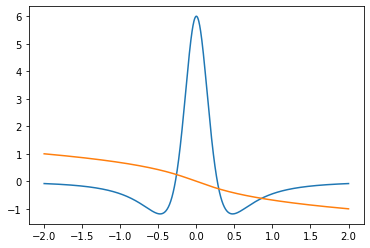

Epoch is 2300, interior loss is 4.602372091118685e-15, boundary loss is 1.5700156032722887e-16,  smoothness loss is 5.844679083070188e-10, overall loss is 5.844740806947131e-11 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-6.2571e-07], device='cuda:0', grad_fn=<SubBackward0>)


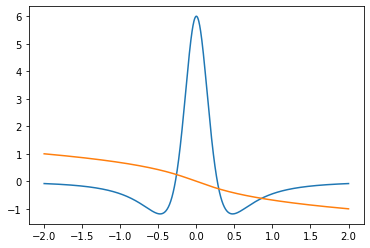

Epoch is 2400, interior loss is 1.9996524462910812e-13, boundary loss is 7.400848541448672e-19,  smoothness loss is 5.937654792663296e-10, overall loss is 5.939654519118072e-11 
tensor([0.5000], device='cuda:0', requires_grad=True)
tensor([-3.1600e-07], device='cuda:0', grad_fn=<SubBackward0>)


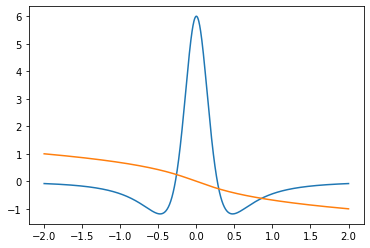

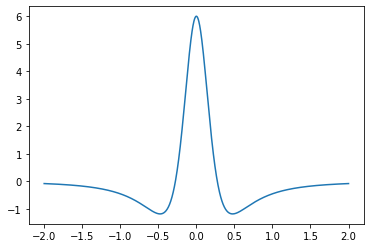

In [16]:
# solving for 0.5
batchsize = 2000
#l = 0.5
for ep in range(2500):
    optimizer = LBFGS(params,line_search_fn = "strong_wolfe")
    l_optimizer = LBFGS([l],line_search_fn = "strong_wolfe")
    #pay attention that the final input y1 needs to be a leaf variable with requires_grad = True
    y1 = torch.rand(batchsize, 1, device='cuda')# (batch, 1) resample y
    y1 = y1*4 - 2
    y1.requires_grad = True
    U = model_U(y1)-model_U(-y1)
    Uy = grad(U.sum(), y1, create_graph=True)[0]
    Fu = -l * U + ((1+l)*y1 + U) * Uy
    Fu_x = grad(Fu.sum(), y1, create_graph=True)[0]
    Fu_xx = grad(Fu_x.sum(), y1, create_graph=True)[0]
    Fu_xxx = grad(Fu_xx.sum(), y1, create_graph=True)[0]
    loss_i = torch.norm(Fu)**2/batchsize
    loss_s = torch.norm(Fu_xxx)**2/batchsize
    # define the loss on the boundary
    # U(-2) = 1, U(2) = -1
    z = torch.tensor([-2], dtype=torch.float64, device='cuda', requires_grad=True).reshape(1,1) # (batch, 1)
    Utruth = torch.tensor([1], dtype=torch.float64, device='cuda', requires_grad=False).reshape(1,1)

    U = model_U(z)-model_U(-z)
    loss_b = torch.norm(U - Utruth)**2
    loss =0.1*loss_i +1*loss_b +0.1*loss_s
    #do closure as opposed to loss.backward in Adam
    optimizer.step(closure)
    #nn_scheduler.step()

    l_optimizer.step(closure)
    #l_scheduler.step()
    if ep % 100 == 0:
        print("Epoch is {}, interior loss is {}, boundary loss is {},  smoothness loss is {}, overall loss is {} ".format(ep, loss_i.item(),loss_b.item(),loss_s.item(), loss.item()))
        print(l)
        print(l-0.5)
        y = torch.linspace(-2,2,1001, requires_grad=True).cuda().reshape(1001,1)
        U = model_U(y)-model_U(-y)
        plt.plot(y.detach().cpu().numpy(), U.detach().cpu().numpy())
        plt.show()


        Uy = grad(U.sum(), y, create_graph=True)[0]
        Uyy = grad(Uy.sum(), y, create_graph=True)[0]
        Uyyy = grad(Uyy.sum(), y, create_graph=True)[0]

        plt.plot(y.detach().cpu().numpy(), Uyyy.detach().cpu().numpy())
        # plt.show()


boosting

In [29]:
model_U1 = PINN_U().cuda()
l1 = torch.tensor([LAMBDA_INIT,], dtype=torch.float64, device='cuda', requires_grad=True)
params1 = list(model_U1.parameters()) 

optimizer = LBFGS(params1,line_search_fn = "strong_wolfe")

l_optimizer = LBFGS([l1],line_search_fn = "strong_wolfe")
def closure():
    if y1.grad is not None: 
        y1.grad.detach()
        y1.grad.zero_()
    optimizer.zero_grad()
    l_optimizer.zero_grad()
    e=0.000001
    l=l0+e*l1
    U = (model_U(y1)-model_U(-y1))+e*(model_U1(y1)-model_U1(-y1))
    Uy = grad(U.sum(), y1, create_graph=True)[0]
    Fu = -l * U + (y1*(1+l)+ U) * Uy
    Fu_x = grad(Fu.sum(), y1, create_graph=True)[0]
    Fu_xx = grad(Fu_x.sum(), y1, create_graph=True)[0]
    Fu_xxx = grad(Fu_xx.sum(), y1, create_graph=True)[0]
    loss_i = torch.norm(Fu)**2/batchsize
    loss_s =torch.norm(Fu_xxx)**2/batchsize

    z = torch.tensor([-2], dtype=torch.float64, device='cuda', requires_grad=False).reshape(1,1) # (batch, 1)
    Utruth = torch.tensor([1], dtype=torch.float64, device='cuda', requires_grad=False).reshape(1,1)

    U = (model_U(z)-model_U(-z))+e*(model_U1(z)-model_U1(-z))
    loss_b = torch.norm(U - Utruth)**2

    
    loss =0.1*loss_i +1*loss_b +0.1*loss_s
    loss.backward()
    return loss

Epoch is 0, interior loss is 5.6634348185915306e-14, boundary loss is 4.6719884927735195e-14,  smoothness loss is 5.554772054529266e-10, overall loss is 5.5600103865038984e-11 
tensor([0.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.0787e-08], device='cuda:0', grad_fn=<SubBackward0>)


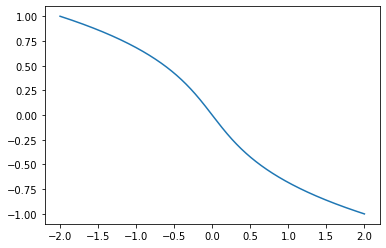

Epoch is 100, interior loss is 4.4790089811273124e-13, boundary loss is 1.2195307843548072e-13,  smoothness loss is 5.999730226178184e-11, overall loss is 6.166473394424937e-12 
tensor([0.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.0787e-08], device='cuda:0', grad_fn=<SubBackward0>)


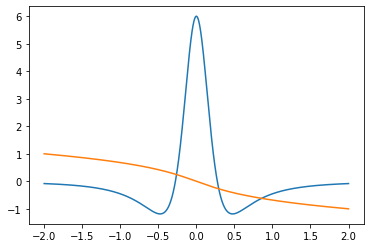

Epoch is 200, interior loss is 3.005507338274599e-13, boundary loss is 4.8414926741333085e-15,  smoothness loss is 2.709546985352674e-12, overall loss is 3.058512645921467e-13 
tensor([0.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.0787e-08], device='cuda:0', grad_fn=<SubBackward0>)


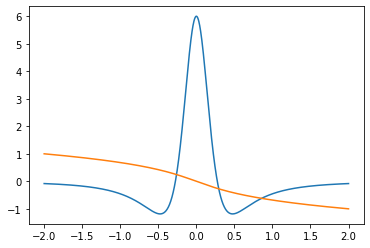

Epoch is 300, interior loss is 4.583326046242281e-15, boundary loss is 6.42169629835168e-17,  smoothness loss is 3.398401077720913e-13, overall loss is 3.4506560344816873e-14 
tensor([0.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.0787e-08], device='cuda:0', grad_fn=<SubBackward0>)


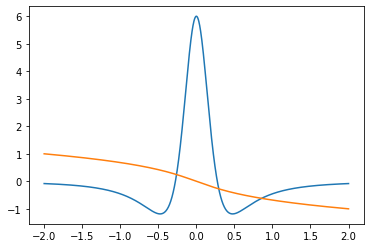

Epoch is 400, interior loss is 1.3311637826434487e-15, boundary loss is 1.1387819475612278e-18,  smoothness loss is 2.084673761662786e-13, overall loss is 2.0980992776839767e-14 
tensor([0.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.0787e-08], device='cuda:0', grad_fn=<SubBackward0>)


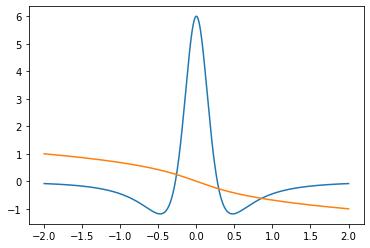

Epoch is 500, interior loss is 1.1158023226161326e-15, boundary loss is 1.1443047678143664e-17,  smoothness loss is 1.6762089787193917e-13, overall loss is 1.6885113067133676e-14 
tensor([0.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.0787e-08], device='cuda:0', grad_fn=<SubBackward0>)


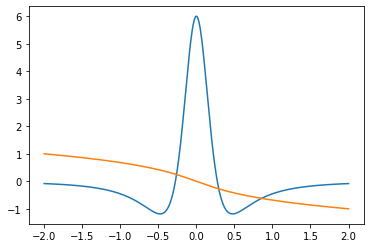

Epoch is 600, interior loss is 1.478751695424012e-15, boundary loss is 8.928784011739862e-18,  smoothness loss is 1.3766130155273967e-13, overall loss is 1.3922934108828109e-14 
tensor([0.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.0787e-08], device='cuda:0', grad_fn=<SubBackward0>)


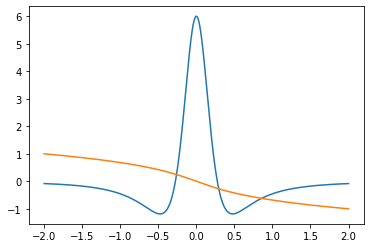

Epoch is 700, interior loss is 1.8671707696615374e-15, boundary loss is 6.626859064689005e-17,  smoothness loss is 1.2828526108657761e-13, overall loss is 1.3081511776270806e-14 
tensor([0.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.0787e-08], device='cuda:0', grad_fn=<SubBackward0>)


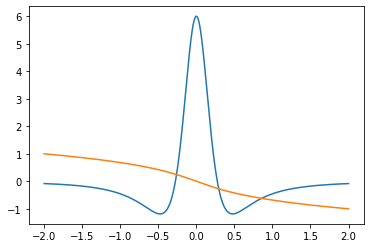

Epoch is 800, interior loss is 1.5500779780882906e-15, boundary loss is 1.3128440417678147e-17,  smoothness loss is 1.1411573172494743e-13, overall loss is 1.157970941072125e-14 
tensor([0.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.0787e-08], device='cuda:0', grad_fn=<SubBackward0>)


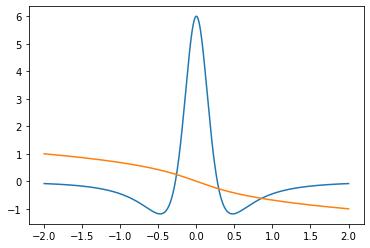

Epoch is 900, interior loss is 1.555418941951686e-15, boundary loss is 4.691510990162044e-20,  smoothness loss is 1.1105127090097569e-13, overall loss is 1.126071589940264e-14 
tensor([0.5000], device='cuda:0', grad_fn=<AddBackward0>)
tensor([-3.0787e-08], device='cuda:0', grad_fn=<SubBackward0>)


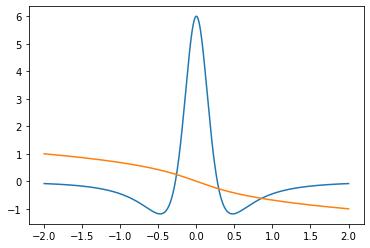

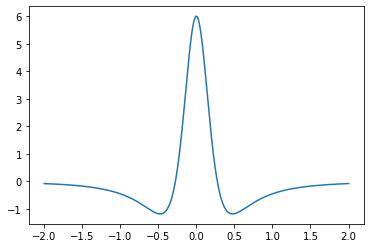

In [30]:
# solving for 0.5
batchsize = 2000
e=0.000001
#l = 0.5
for ep in range(1000):
    optimizer = LBFGS(params1,line_search_fn = "strong_wolfe")
    l_optimizer = LBFGS([l1],line_search_fn = "strong_wolfe")
    #pay attention that the final input y1 needs to be a leaf variable with requires_grad = True
    l=l0+e*l1
    y1 = torch.rand(batchsize, 1, device='cuda')# (batch, 1) resample y
    y1 = y1*4 - 2
    y1.requires_grad = True
    U = (model_U(y1)-model_U(-y1))+e*(model_U1(y1)-model_U1(-y1))
    Uy = grad(U.sum(), y1, create_graph=True)[0]
    Fu = -l * U + ((1+l)*y1 + U) * Uy
    Fu_x = grad(Fu.sum(), y1, create_graph=True)[0]
    Fu_xx = grad(Fu_x.sum(), y1, create_graph=True)[0]
    Fu_xxx = grad(Fu_xx.sum(), y1, create_graph=True)[0]
    loss_i = torch.norm(Fu)**2/batchsize
    loss_s = torch.norm(Fu_xxx)**2/batchsize
    # define the loss on the boundary
    # U(-2) = 1, U(2) = -1
    z = torch.tensor([-2], dtype=torch.float64, device='cuda', requires_grad=True).reshape(1,1) # (batch, 1)
    Utruth = torch.tensor([1], dtype=torch.float64, device='cuda', requires_grad=False).reshape(1,1)

    U = (model_U(z)-model_U(-z))+e*(model_U1(z)-model_U1(-z))
    loss_b = torch.norm(U - Utruth)**2
    loss =0.1*loss_i +1*loss_b +0.1*loss_s
    #do closure as opposed to loss.backward in Adam
    optimizer.step(closure)
    #nn_scheduler.step()

    l_optimizer.step(closure)
    #l_scheduler.step()
    if ep % 100 == 0:
        print("Epoch is {}, interior loss is {}, boundary loss is {},  smoothness loss is {}, overall loss is {} ".format(ep, loss_i.item(),loss_b.item(),loss_s.item(), loss.item()))
        print(l)
        print(l-0.5)
        y = torch.linspace(-2,2,1001, requires_grad=True).cuda().reshape(1001,1)
        U = (model_U(y)-model_U(-y))+e*(model_U1(y)-model_U1(-y))
        plt.plot(y.detach().cpu().numpy(), U.detach().cpu().numpy())
        plt.show()


        Uy = grad(U.sum(), y, create_graph=True)[0]
        Uyy = grad(Uy.sum(), y, create_graph=True)[0]
        Uyyy = grad(Uyy.sum(), y, create_graph=True)[0]

        plt.plot(y.detach().cpu().numpy(), Uyyy.detach().cpu().numpy())
        # plt.show()


In [4]:
import torch
from functools import reduce
from torch.optim import Optimizer

__all__ = ['LBFGS']

def _cubic_interpolate(x1, f1, g1, x2, f2, g2, bounds=None):
    # ported from https://github.com/torch/optim/blob/master/polyinterp.lua
    # Compute bounds of interpolation area
    if bounds is not None:
        xmin_bound, xmax_bound = bounds
    else:
        xmin_bound, xmax_bound = (x1, x2) if x1 <= x2 else (x2, x1)

    # Code for most common case: cubic interpolation of 2 points
    #   w/ function and derivative values for both
    # Solution in this case (where x2 is the farthest point):
    #   d1 = g1 + g2 - 3*(f1-f2)/(x1-x2);
    #   d2 = sqrt(d1^2 - g1*g2);
    #   min_pos = x2 - (x2 - x1)*((g2 + d2 - d1)/(g2 - g1 + 2*d2));
    #   t_new = min(max(min_pos,xmin_bound),xmax_bound);
    d1 = g1 + g2 - 3 * (f1 - f2) / (x1 - x2)
    d2_square = d1**2 - g1 * g2
    if d2_square >= 0:
        d2 = d2_square.sqrt()
        if x1 <= x2:
            min_pos = x2 - (x2 - x1) * ((g2 + d2 - d1) / (g2 - g1 + 2 * d2))
        else:
            min_pos = x1 - (x1 - x2) * ((g1 + d2 - d1) / (g1 - g2 + 2 * d2))
        return min(max(min_pos, xmin_bound), xmax_bound)
    else:
        return (xmin_bound + xmax_bound) / 2.


def _strong_wolfe(obj_func,
                  x,
                  t,
                  d,
                  f,
                  g,
                  gtd,
                  c1=1e-4,
                  c2=0.9,
                  tolerance_change=1e-9,
                  max_ls=25):
    # ported from https://github.com/torch/optim/blob/master/lswolfe.lua
    d_norm = d.abs().max()
    g = g.clone()
    # evaluate objective and gradient using initial step
    f_new, g_new = obj_func(x, t, d)
    ls_func_evals = 1
    gtd_new = g_new.dot(d)

    # bracket an interval containing a point satisfying the Wolfe criteria
    t_prev, f_prev, g_prev, gtd_prev = 0, f, g, gtd
    done = False
    ls_iter = 0
    while ls_iter < max_ls:
        # check conditions
        if f_new > (f + c1 * t * gtd) or (ls_iter > 1 and f_new >= f_prev):
            bracket = [t_prev, t]
            bracket_f = [f_prev, f_new]
            bracket_g = [g_prev, g_new.clone()]
            bracket_gtd = [gtd_prev, gtd_new]
            break

        if abs(gtd_new) <= -c2 * gtd:
            bracket = [t]
            bracket_f = [f_new]
            bracket_g = [g_new]
            done = True
            break

        if gtd_new >= 0:
            bracket = [t_prev, t]
            bracket_f = [f_prev, f_new]
            bracket_g = [g_prev, g_new.clone()]
            bracket_gtd = [gtd_prev, gtd_new]
            break

        # interpolate
        min_step = t + 0.01 * (t - t_prev)
        max_step = t * 10
        tmp = t
        t = _cubic_interpolate(
            t_prev,
            f_prev,
            gtd_prev,
            t,
            f_new,
            gtd_new,
            bounds=(min_step, max_step))

        # next step
        t_prev = tmp
        f_prev = f_new
        g_prev = g_new.clone()
        gtd_prev = gtd_new
        f_new, g_new = obj_func(x, t, d)
        ls_func_evals += 1
        gtd_new = g_new.dot(d)
        ls_iter += 1

    # reached max number of iterations?
    if ls_iter == max_ls:
        bracket = [0, t]
        bracket_f = [f, f_new]
        bracket_g = [g, g_new]

    # zoom phase: we now have a point satisfying the criteria, or
    # a bracket around it. We refine the bracket until we find the
    # exact point satisfying the criteria
    insuf_progress = False
    # find high and low points in bracket
    low_pos, high_pos = (0, 1) if bracket_f[0] <= bracket_f[-1] else (1, 0)
    while not done and ls_iter < max_ls:
        # line-search bracket is so small
        if abs(bracket[1] - bracket[0]) * d_norm < tolerance_change:
            break

        # compute new trial value
        t = _cubic_interpolate(bracket[0], bracket_f[0], bracket_gtd[0],
                               bracket[1], bracket_f[1], bracket_gtd[1])

        # test that we are making sufficient progress:
        # in case `t` is so close to boundary, we mark that we are making
        # insufficient progress, and if
        #   + we have made insufficient progress in the last step, or
        #   + `t` is at one of the boundary,
        # we will move `t` to a position which is `0.1 * len(bracket)`
        # away from the nearest boundary point.
        eps = 0.1 * (max(bracket) - min(bracket))
        if min(max(bracket) - t, t - min(bracket)) < eps:
            # interpolation close to boundary
            if insuf_progress or t >= max(bracket) or t <= min(bracket):
                # evaluate at 0.1 away from boundary
                if abs(t - max(bracket)) < abs(t - min(bracket)):
                    t = max(bracket) - eps
                else:
                    t = min(bracket) + eps
                insuf_progress = False
            else:
                insuf_progress = True
        else:
            insuf_progress = False

        # Evaluate new point
        f_new, g_new = obj_func(x, t, d)
        ls_func_evals += 1
        gtd_new = g_new.dot(d)
        ls_iter += 1

        if f_new > (f + c1 * t * gtd) or f_new >= bracket_f[low_pos]:
            # Armijo condition not satisfied or not lower than lowest point
            bracket[high_pos] = t
            bracket_f[high_pos] = f_new
            bracket_g[high_pos] = g_new.clone()
            bracket_gtd[high_pos] = gtd_new
            low_pos, high_pos = (0, 1) if bracket_f[0] <= bracket_f[1] else (1, 0)
        else:
            if abs(gtd_new) <= -c2 * gtd:
                # Wolfe conditions satisfied
                done = True
            elif gtd_new * (bracket[high_pos] - bracket[low_pos]) >= 0:
                # old high becomes new low
                bracket[high_pos] = bracket[low_pos]
                bracket_f[high_pos] = bracket_f[low_pos]
                bracket_g[high_pos] = bracket_g[low_pos]
                bracket_gtd[high_pos] = bracket_gtd[low_pos]

            # new point becomes new low
            bracket[low_pos] = t
            bracket_f[low_pos] = f_new
            bracket_g[low_pos] = g_new.clone()
            bracket_gtd[low_pos] = gtd_new

    # return stuff
    t = bracket[low_pos]
    f_new = bracket_f[low_pos]
    g_new = bracket_g[low_pos]
    return f_new, g_new, t, ls_func_evals



class LBFGS(Optimizer):
    """Implements L-BFGS algorithm, heavily inspired by `minFunc
    <https://www.cs.ubc.ca/~schmidtm/Software/minFunc.html>`_.

    .. warning::
        This optimizer doesn't support per-parameter options and parameter
        groups (there can be only one).

    .. warning::
        Right now all parameters have to be on a single device. This will be
        improved in the future.

    .. note::
        This is a very memory intensive optimizer (it requires additional
        ``param_bytes * (history_size + 1)`` bytes). If it doesn't fit in memory
        try reducing the history size, or use a different algorithm.

    Args:
        lr (float): learning rate (default: 1)
        max_iter (int): maximal number of iterations per optimization step
            (default: 20)
        max_eval (int): maximal number of function evaluations per optimization
            step (default: max_iter * 1.25).
        tolerance_grad (float): termination tolerance on first order optimality
            (default: 1e-5).
        tolerance_change (float): termination tolerance on function
            value/parameter changes (default: 1e-9).
        history_size (int): update history size (default: 100).
        line_search_fn (str): either 'strong_wolfe' or None (default: None).
    """

    def __init__(self,
                 params,
                 lr=1,
                 max_iter=20,
                 max_eval=None,
                 tolerance_grad=1e-32,
                 tolerance_change=1e-32,
                 tolerance_ys = 1e-32,
                 history_size=100,
                 line_search_fn=None):
        if max_eval is None:
            max_eval = max_iter * 5 // 4
        defaults = dict(
            lr=lr,
            max_iter=max_iter,
            max_eval=max_eval,
            tolerance_grad=tolerance_grad,
            tolerance_change=tolerance_change,
            tolerance_ys = tolerance_ys,
            history_size=history_size,
            line_search_fn=line_search_fn)
        super(LBFGS, self).__init__(params, defaults)

        if len(self.param_groups) != 1:
            raise ValueError("LBFGS doesn't support per-parameter options "
                             "(parameter groups)")

        self._params = self.param_groups[0]['params']
        self._numel_cache = None

    def _numel(self):
        if self._numel_cache is None:
            self._numel_cache = reduce(lambda total, p: total + p.numel(), self._params, 0)
        return self._numel_cache

    def _gather_flat_grad(self):
        views = []
        for p in self._params:
            if p.grad is None:
                view = p.new(p.numel()).zero_()
            elif p.grad.is_sparse:
                view = p.grad.to_dense().view(-1)
            else:
                view = p.grad.view(-1)
            views.append(view)
        return torch.cat(views, 0)

    def _add_grad(self, step_size, update):
        offset = 0
        for p in self._params:
            numel = p.numel()
            # view as to avoid deprecated pointwise semantics
            p.add_(update[offset:offset + numel].view_as(p), alpha=step_size)
            offset += numel
        assert offset == self._numel()

    def _clone_param(self):
        return [p.clone() for p in self._params]

    def _set_param(self, params_data):
        for p, pdata in zip(self._params, params_data):
            p.copy_(pdata)

    def _directional_evaluate(self, closure, x, t, d):
        self._add_grad(t, d)
        loss = float(closure())
        flat_grad = self._gather_flat_grad()
        self._set_param(x)
        return loss, flat_grad


    @torch.no_grad()
    def step(self, closure):
        """Performs a single optimization step.

        Args:
            closure (Callable): A closure that reevaluates the model
                and returns the loss.
        """
        assert len(self.param_groups) == 1

        # Make sure the closure is always called with grad enabled
        closure = torch.enable_grad()(closure)

        group = self.param_groups[0]
        lr = group['lr']
        max_iter = group['max_iter']
        max_eval = group['max_eval']
        tolerance_grad = group['tolerance_grad']
        tolerance_change = group['tolerance_change']
        tolerance_ys = group['tolerance_ys']
        line_search_fn = group['line_search_fn']
        history_size = group['history_size']

        # NOTE: LBFGS has only global state, but we register it as state for
        # the first param, because this helps with casting in load_state_dict
        state = self.state[self._params[0]]
        state.setdefault('func_evals', 0)
        state.setdefault('n_iter', 0)

        # evaluate initial f(x) and df/dx
        orig_loss = closure()
        loss = float(orig_loss)
        current_evals = 1
        state['func_evals'] += 1

        flat_grad = self._gather_flat_grad()
        opt_cond = flat_grad.abs().max() <= tolerance_grad

        # optimal condition
        if opt_cond:
            return orig_loss

        # tensors cached in state (for tracing)
        d = state.get('d')
        t = state.get('t')
        old_dirs = state.get('old_dirs')
        old_stps = state.get('old_stps')
        ro = state.get('ro')
        H_diag = state.get('H_diag')
        prev_flat_grad = state.get('prev_flat_grad')
        prev_loss = state.get('prev_loss')

        n_iter = 0
        # optimize for a max of max_iter iterations
        while n_iter < max_iter:
            # keep track of nb of iterations
            n_iter += 1
            state['n_iter'] += 1

            ############################################################
            # compute gradient descent direction
            ############################################################
            if state['n_iter'] == 1:
                d = flat_grad.neg()
                old_dirs = []
                old_stps = []
                ro = []
                H_diag = 1
            else:
                # do lbfgs update (update memory)
                y = flat_grad.sub(prev_flat_grad)
                s = d.mul(t)
                ys = y.dot(s)  # y*s
                if ys > tolerance_ys:
                    # updating memory
                    if len(old_dirs) == history_size:
                        # shift history by one (limited-memory)
                        old_dirs.pop(0)
                        old_stps.pop(0)
                        ro.pop(0)

                    # store new direction/step
                    old_dirs.append(y)
                    old_stps.append(s)
                    ro.append(1. / ys)

                    # update scale of initial Hessian approximation
                    H_diag = ys / y.dot(y)  # (y*y)

                # compute the approximate (L-BFGS) inverse Hessian
                # multiplied by the gradient
                num_old = len(old_dirs)

                if 'al' not in state:
                    state['al'] = [None] * history_size
                al = state['al']

                # iteration in L-BFGS loop collapsed to use just one buffer
                q = flat_grad.neg()
                for i in range(num_old - 1, -1, -1):
                    al[i] = old_stps[i].dot(q) * ro[i]
                    q.add_(old_dirs[i], alpha=-al[i])

                # multiply by initial Hessian
                # r/d is the final direction
                d = r = torch.mul(q, H_diag)
                for i in range(num_old):
                    be_i = old_dirs[i].dot(r) * ro[i]
                    r.add_(old_stps[i], alpha=al[i] - be_i)

            if prev_flat_grad is None:
                prev_flat_grad = flat_grad.clone()#memory_format=torch.contiguous_format)
            else:
                prev_flat_grad.copy_(flat_grad)
            prev_loss = loss

            ############################################################
            # compute step length
            ############################################################
            # reset initial guess for step size
            if state['n_iter'] == 1:
                t = min(1., 1. / flat_grad.abs().sum()) * lr
            else:
                t = lr

            # directional derivative
            gtd = flat_grad.dot(d)  # g * d

            # directional derivative is below tolerance
            if gtd > -tolerance_change:
                break

            # optional line search: user function
            ls_func_evals = 0
            if line_search_fn is not None:
                # perform line search, using user function
                if line_search_fn != "strong_wolfe":
                    raise RuntimeError("only 'strong_wolfe' is supported")
                else:
                    x_init = self._clone_param()

                    def obj_func(x, t, d):
                        return self._directional_evaluate(closure, x, t, d)

                    loss, flat_grad, t, ls_func_evals = _strong_wolfe(
                        obj_func, x_init, t, d, loss, flat_grad, gtd)
                self._add_grad(t, d)
                opt_cond = flat_grad.abs().max() <= tolerance_grad
            else:
                # no line search, simply move with fixed-step
                self._add_grad(t, d)
                if n_iter != max_iter:
                    # re-evaluate function only if not in last iteration
                    # the reason we do this: in a stochastic setting,
                    # no use to re-evaluate that function here
                    with torch.enable_grad():
                        loss = float(closure())
                    flat_grad = self._gather_flat_grad()
                    opt_cond = flat_grad.abs().max() <= tolerance_grad
                    ls_func_evals = 1

            # update func eval
            current_evals += ls_func_evals
            state['func_evals'] += ls_func_evals

            ############################################################
            # check conditions
            ############################################################
            if n_iter == max_iter:
                break

            if current_evals >= max_eval:
                break

            # optimal condition
            if opt_cond:
                break

            # lack of progress
            if d.mul(t).abs().max() <= tolerance_change:
                break

            if abs(loss - prev_loss) < tolerance_change:
                break

        state['d'] = d
        state['t'] = t
        state['old_dirs'] = old_dirs
        state['old_stps'] = old_stps
        state['ro'] = ro
        state['H_diag'] = H_diag
        state['prev_flat_grad'] = prev_flat_grad
        state['prev_loss'] = prev_loss

        return orig_loss
